# Freierfall ohne Luftwiederstand

# Freierfall mit Luftwiderstand (Erweiterung)

Hier berechnen wir zuerst die benötigte Querschnittsfläche A, sodass eine Person mit Masse m=80 kg eine terminale Geschwindigkeit von v_t=4 m/s erreicht (vereinfachtes quadratisches Widerstandsmodell).

Annahmen: Dichte der Luft rho=1.225 kg/m^3, Widerstandsbeiwert Cd (stehender Mensch) etwa 1.0.

Benötigte Querschnittsfläche A für v_t=4.0 m/s: 80.0816 m^2
Nach Simulation (t=1.34s) Geschwindigkeit v=3.990 m/s


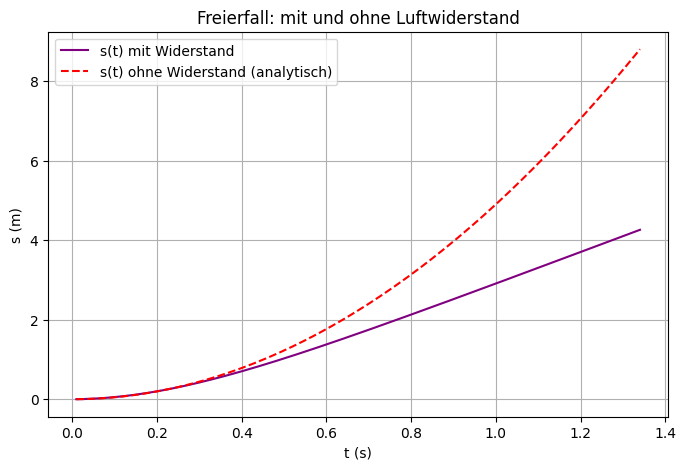

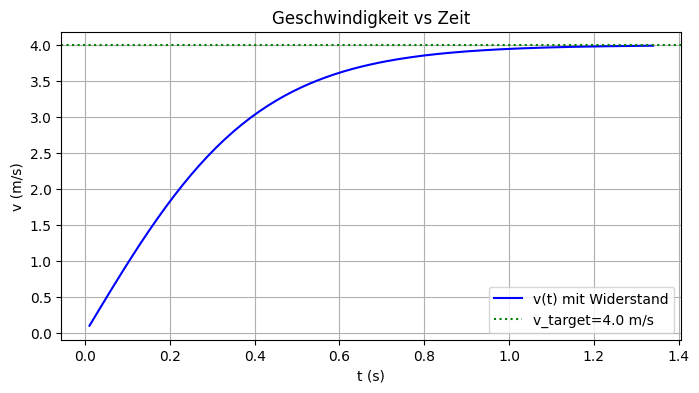

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

# Grundparameter
t = 0.0
g = 9.81
m = 80.0  # kg
dt = 0.01  # s, kleinere Schrittweite für bessere Genauigkeit

# Parameter für Widerstand
rho = 1.225  # kg/m^3 Luftdichte
Cd = 1.0     # angenommener Widerstandsbeiwert für stehenden Menschen
v_terminal_target = 4.0  # m/s, gewünschte terminale Geschwindigkeit

# Berechnung der benötigten Querschnittsfläche A aus: m*g = 0.5 * rho * Cd * A * v_t^2
A_needed = (m * g) / (0.5 * rho * Cd * v_terminal_target**2)
print(f'Benötigte Querschnittsfläche A für v_t={v_terminal_target} m/s: {A_needed:.4f} m^2')

# --- Simulation: freier Fall mit quadratischem Luftwiderstand ---
# Anfangsbedingungen
t = 0.0
v = 0.0
s = 0.0
T_max = 10.0  # s

tr = []
vr = []
sr = []
# Simulation mit berechnetem A
A = A_needed

while t < T_max:
    # Resistive force: F_d = 0.5 * rho * Cd * A * v^2, Richtung entgegen der Bewegung
    Fd = 0.5 * rho * Cd * A * v * abs(v)
    # Beschleunigung: a = (m*g - Fd) / m (nach unten positiv)
    a = g - Fd / m
    # Euler-Integration
    v = v + a * dt
    s = s + v * dt
    t = t + dt
    tr.append(t)
    vr.append(v)
    sr.append(s)
    # Abbruch wenn v nahe v_terminal
    if abs(v - v_terminal_target) < 0.01 and t > 0.5:
        # wir haben die gewünschte terminale Geschwindigkeit erreicht
        break

print(f'Nach Simulation (t={t:.2f}s) Geschwindigkeit v={v:.3f} m/s')

# Plots: mit analytischer (ohne Widerstand) Vergleichskurve s=0.5*g*t^2
plt.figure(figsize=(8,5))
plt.plot(tr, sr, color='purple', label='s(t) mit Widerstand')
# ohne Widerstand: berechne analytisch für gleiche Zeitpunkte
tg = np.array(tr)
s_no = 0.5 * g * tg**2
plt.plot(tr, s_no, color='red', linestyle='--', label='s(t) ohne Widerstand (analytisch)')
plt.xlabel('t (s)')
plt.ylabel('s (m)')
plt.title('Freierfall: mit und ohne Luftwiderstand')
plt.grid(True)
plt.legend()
plt.show()

# Geschwindigkeit vs Zeit
plt.figure(figsize=(8,4))
plt.plot(tr, vr, color='blue', label='v(t) mit Widerstand')
plt.axhline(v_terminal_target, color='green', linestyle=':', label=f'v_target={v_terminal_target} m/s')
plt.xlabel('t (s)')
plt.ylabel('v (m/s)')
plt.title('Geschwindigkeit vs Zeit')
plt.grid(True)
plt.legend()
plt.show()
